# AM2061 Algorithm 3-5
## Jacobi Method

The Jacobi Method is used to solve a set of linear equations with iterative techniques.

It iterates through a set of linear equations, originally of form $Ax = b$ with:

\begin{gather}
\begin{bmatrix}
a_{11} & \dots & a_{1n} \\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nn}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
\vdots \\
x_n
\end{bmatrix}
=
\begin{bmatrix}
b_1 \\
\vdots \\
b_n
\end{bmatrix}
\end{gather}

If we look at each individual equation (each row), we can see that it is possible to rearrange to have one of the unknowns on the left, with the others added with their inputs and the corresponding output on the right:

\begin{equation} x_i = \frac{1}{a_{ii}} \left[ b_i - \sum\limits_{j = 1, j != i}^{n} a_{ij}x_j \right] \end{equation}

Computed for each unknown $i$. Essentially, this means that we can use the previous guesses of the unknowns to update each new guess, simply by rearranging the equation and iterating the above.

* Create an initial set of guess
  * If none given, default to all zeroes
  
* Update each guess by the above equation

* Check if the new guesses are close to the old guesses
  * Solution found if so
  
* End once maximum iterations reached, or if new guesses are sufficiently close to old guesses

The following is the pseudocode provided:
    
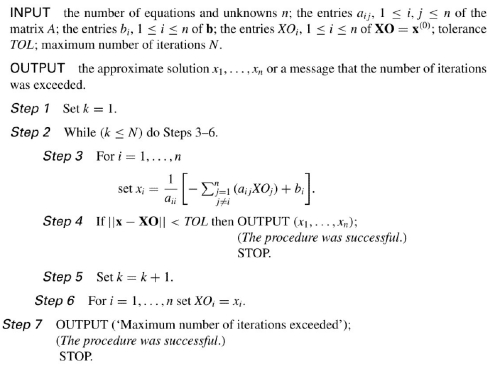

Let us now create this in Python.

First we must define a matrix set of linear equations, for simplicity I will use what was given in L11.

\begin{bmatrix}
10 & -1 & 2 & 0 & 6 \\
-1 & 11 & -1 & 3 & 25 \\
2 & -1 & 10 & -1 & -11 \\
0 & 3 & -1 & 8 & 15
\end{bmatrix}

In [1]:
import numpy as np

a = np.array([[10, -1, 2, 0], 
              [-1, 11, -1, 3], 
              [2, -1, 10, -1], 
              [0, 3, -1, 8]])

b = np.array([[6],
              [25],
              [-11], 
              [15]])

Now let us define the algorithm, we need to pass in the Matrix of inputs $A$, the outputs $b$, the Tolerance (how accurate we want to be) $TOL$, the maximum number of iterations $N$, and optionally the initial guess $x0$.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [2]:
def JacobiMethod(a, b, TOL, N, x0 = None):
    A = np.copy(a)
    # Get size n
    n = len(A)
    # Prepare vectors x and x0
    x = np.zeros([n, 1])
    if x0 is None:
        x0 = np.zeros([n, 1])
    else:
        # Make sure x0 contains floats
        x0 = x0.astype('float64')
    
    # Step 1
    k = 1
    
    # Step 2
    while k <= N:
        # Step 3
        for i in range(n):
            summation = 0
            for j in range(n):
                if j != i:
                    summation += A[i][j] * x0[j]
            
            x[i] = (-summation + b[i]) / A[i][i]
            
        # Step 4
        if np.linalg.norm(x - x0) < TOL: # gets the L2 norm of x - x0
            print("Tolerance reached.")
            return x
        
        # Step 5
        k += 1
        
        # Step 6
        x0 = x.copy()
        
    # Step 7
    print("Maximum Iterations reached.")
    return x

We can now test this algorithm for a solution, which will be returned as an array x:

In [3]:
JacobiMethod(a, b, 0.0000000001, 100)

Tolerance reached.


array([[ 1.],
       [ 2.],
       [-1.],
       [ 1.]])